### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.duplicated().value_counts()

False    12610
True        74
Name: count, dtype: int64

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data = data.fillna(method='bfill')
data.drop_duplicates(inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
data['Y'].value_counts()[1] / data['Y'].count()

0.567676607863302

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

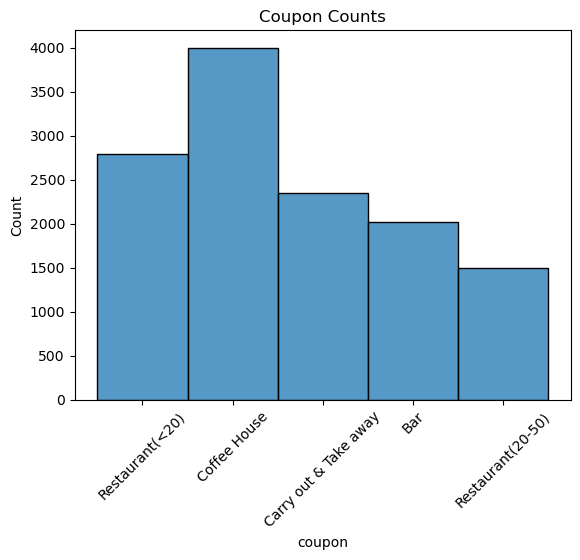

In [10]:
sns.histplot(data['coupon'])
plt.title('Coupon Counts')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature (F)')

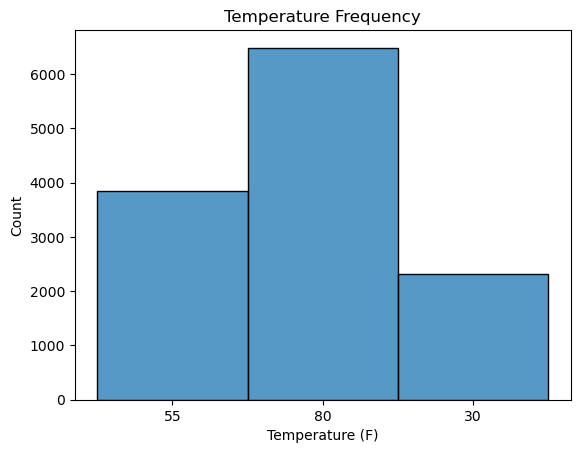

In [12]:
sns.histplot(data['temperature'].astype(str))
plt.title('Temperature Frequency')
plt.xlabel('Temperature (F)')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_coupon_dataframe = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [14]:
bar_coupon_dataframe['Y'].value_counts()[1] / bar_coupon_dataframe['Y'].count()

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


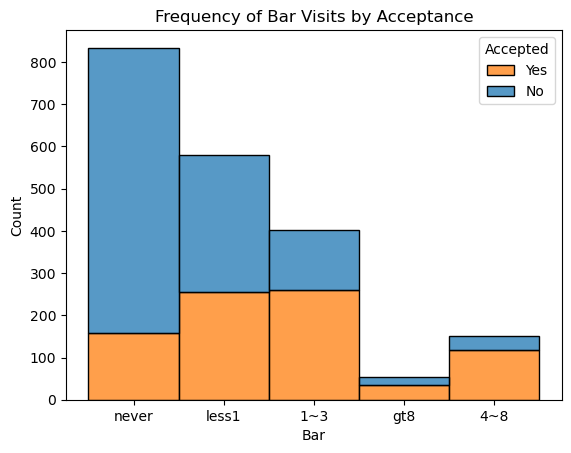

In [15]:
sns.histplot(bar_coupon_dataframe, x='Bar', hue=bar_coupon_dataframe['Y'], multiple="stack")
plt.title('Frequency of Bar Visits by Acceptance')
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.savefig('images/acceptance_freq.png')

Observation : Those who visited bars more often were more likely to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


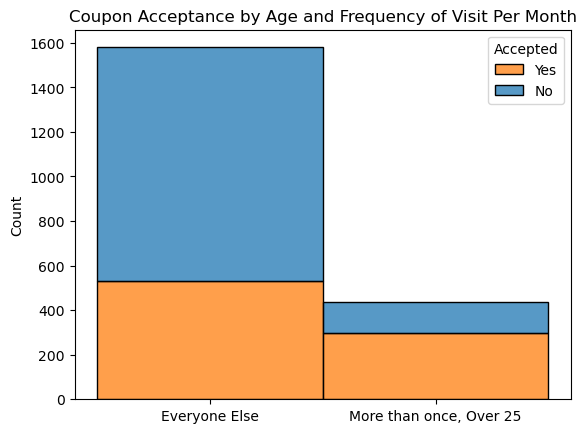

In [16]:
bar_coupon_monthly = bar_coupon_dataframe.copy(deep=True)
#data cleaning for this case
bar_coupon_monthly['age'] = pd.to_numeric(bar_coupon_monthly['age'], errors='coerce')
bar_coupon_monthly = bar_coupon_monthly.fillna(51)

#where clause to create new column
bar_coupon_monthly['more_than_once'] = np.where(
    (
        (bar_coupon_monthly['Bar'].isin(['1~3','gt8','4~8'])) &
        (bar_coupon_monthly['age'].astype(int) > 25)
    )
    , "More than once, Over 25", "Everyone Else")



sns.histplot(bar_coupon_monthly, x='more_than_once', hue=bar_coupon_monthly['Y'], multiple="stack")
plt.title('Coupon Acceptance by Age and Frequency of Visit Per Month')
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xlabel('')
plt.savefig('images/acceptance_age_freq.png')

In [ ]:
Those over 25 and who visited the bar more than once a month were more likely to accept the coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


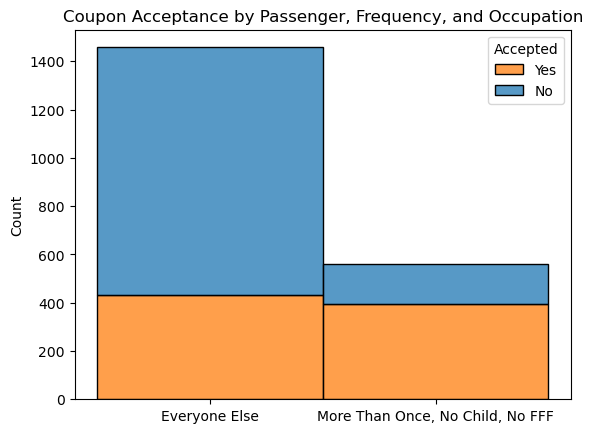

In [17]:
bar_monthly_passenger_occ = bar_coupon_dataframe.copy(deep=True)
bar_monthly_passenger_occ.head(50)
#where clause to create new column with criteria
bar_monthly_passenger_occ['more_kid_occ'] = np.where(
        (
            (bar_monthly_passenger_occ['Bar'].isin(['1~3','gt8','4~8'])) &
            (bar_monthly_passenger_occ['passanger']!= "Kid(s)") &
            (bar_monthly_passenger_occ['occupation'] != "Farming Fishing & Forestry")
        ),
        "More Than Once, No Child, No FFF", "Everyone Else"
    )

sns.histplot(bar_monthly_passenger_occ, x='more_kid_occ', hue=bar_monthly_passenger_occ['Y'], multiple="stack")
plt.title('Coupon Acceptance by Passenger, Frequency, and Occupation')
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xlabel('')

plt.savefig('images/acceptance_pass_freq_occ.png')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



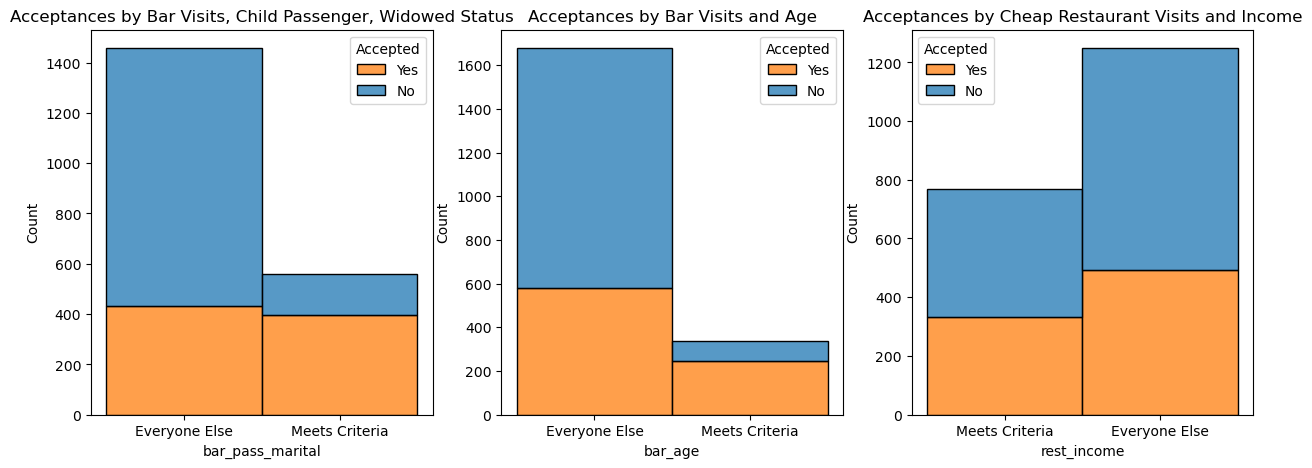

In [18]:
bar_monthly_passenger_occ = bar_coupon_dataframe.copy(deep=True)
bar_monthly_passenger_occ['age'] = pd.to_numeric(bar_monthly_passenger_occ['age'], errors='coerce')
bar_monthly_passenger_occ['income'] = pd.to_numeric(bar_monthly_passenger_occ['age'], errors='coerce')
bar_monthly_passenger_occ = bar_monthly_passenger_occ.fillna(51)


#where clause to create new column for visits, passenger, and marital status
bar_monthly_passenger_occ['bar_pass_marital'] = np.where(
        (
            (
                (bar_monthly_passenger_occ['Bar'].isin(['1~3','gt8','4~8'])) &
                (bar_monthly_passenger_occ['passanger']!= "Kid(s)") &
                (bar_monthly_passenger_occ['maritalStatus'] != "Widowed")
            )
        
        ),
        "Meets Criteria", "Everyone Else"
    )

#where clause to create new column for visits and age
bar_monthly_passenger_occ['bar_age'] = np.where(
        (
            (
                (bar_monthly_passenger_occ['Bar'].isin(['1~3','gt8','4~8'])) &
                (bar_monthly_passenger_occ['age'] < 30) 
            )
        
        ),
        "Meets Criteria", "Everyone Else"
    )

#where clause to create new column for visits and income
bar_monthly_passenger_occ['rest_income'] = np.where(
        (
            (
                (bar_monthly_passenger_occ['RestaurantLessThan20'].isin(['gt8','4~8'])) &
                (bar_monthly_passenger_occ['income'] < 50000) 
            )
        
        ),
        "Meets Criteria", "Everyone Else"
    )
            
            
            
bar_monthly_passenger_occ.head(50)

#multiple axis for readability
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(bar_monthly_passenger_occ, x='bar_pass_marital', hue=bar_monthly_passenger_occ['Y'], multiple="stack", ax=axes[0])
sns.histplot(bar_monthly_passenger_occ, x='bar_age', hue=bar_monthly_passenger_occ['Y'], multiple="stack", ax=axes[1])
sns.histplot(bar_monthly_passenger_occ, x='rest_income', hue=bar_monthly_passenger_occ['Y'], multiple="stack", ax=axes[2])

axes[0].legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
axes[0].set_title('Acceptances by Bar Visits, Child Passenger, Widowed Status')

axes[1].legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
axes[1].set_title('Acceptances by Bar Visits and Age')

axes[2].legend(title='Accepted', loc='upper left', labels=['Yes', 'No'])
axes[2].set_title('Acceptances by Cheap Restaurant Visits and Income')

plt.savefig('images/acceptance_by_several_criteria.png')

In this we can see that a greater proportion of people from the selected categories accepted the coupons. Those with lower income and who eat out more at cheaper restaurants were still more likely to accept the coupon, but not by much.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
I hypothesize that the individuals most likely to use the coupon were regular visitors of the bar.

I believe this is the case because using the coupon would be convenient for them, whereas someone who never visited the bar would be unlikely to start going just because of a coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
First, is to verify which coupon types are the most widely accepted

Verification of accepted coupons by type

/var/folders/cn/_r01mz3x7m330ngs9jlhs0n80000gp/T/ipykernel_66158/1156298684.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['No', 'Yes'])


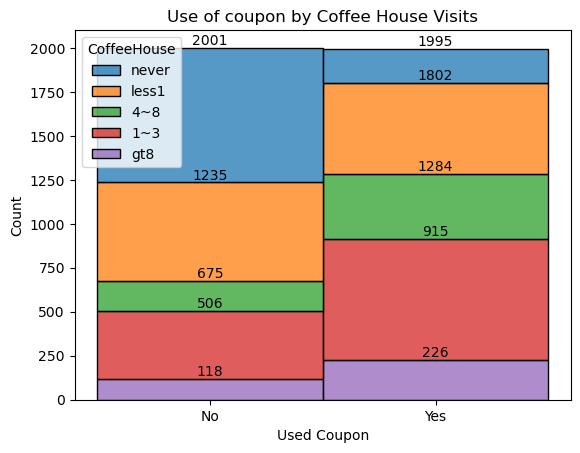

In [23]:
coffee_house_data = data[data['coupon'] == 'Coffee House'].copy(deep=True)


acceptance_df = coffee_house_data.copy(deep=True)
acceptance_df['Y'] = acceptance_df['Y'].astype(str)
plot = sns.histplot(acceptance_df, x='Y', hue=coffee_house_data['CoffeeHouse'], multiple="stack")


plot.set(xlabel ="Used Coupon", title ='Use of coupon by Coffee House Visits')

for item in plot.containers:
    plot.bar_label(item, fontsize=10)
plot.set_xticklabels(['No', 'Yes'])
plt.savefig('images/acceptance_overall.png')

In [ ]:
The above graph shows that among all people given coupons, half accepted them for the coffee shop.

Some of the toCoupon time measurements are positively correlated with each other. Acceptances are also weakly correlated with temperature and direction. As temperature goes up, so does the liklihood of acceptance. Next we will subplot time to coupons, temperature, and acceptance.

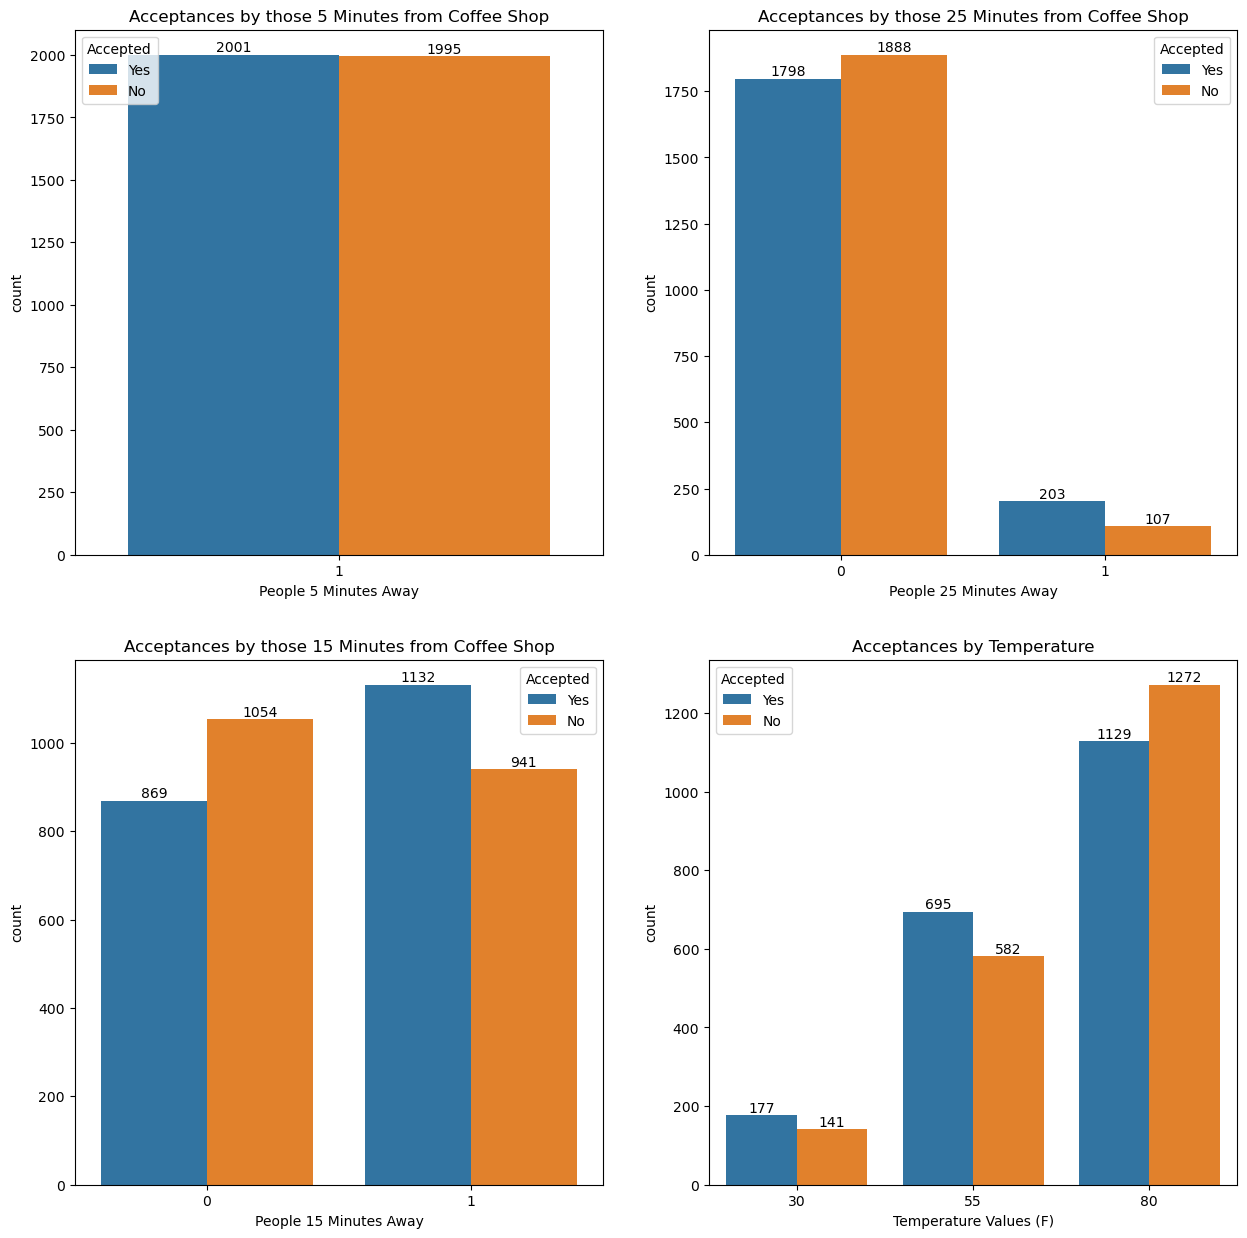

In [25]:
#multiple axis for graph readibility
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(coffee_house_data, x='toCoupon_GEQ5min', hue=coffee_house_data['Y'], ax=axes[0,0])
sns.countplot(coffee_house_data, x='toCoupon_GEQ15min', hue=coffee_house_data['Y'], ax=axes[1,0])
sns.countplot(coffee_house_data, x='toCoupon_GEQ25min', hue=coffee_house_data['Y'], ax=axes[0,1])
sns.countplot(coffee_house_data, x='temperature', hue=coffee_house_data['Y'], ax=axes[1,1])


#labels for each graph
axes[0,0].legend(title='Accepted', loc='upper left', labels=['Yes', 'No'])
axes[0,0].set(xlabel ="People 5 Minutes Away", title ='Acceptances by those 5 Minutes from Coffee Shop')
axes[0,0].bar_label(axes[0,0].containers[0], fontsize=10);
axes[0,0].bar_label(axes[0,0].containers[1], fontsize=10);

axes[0,1].legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
axes[0,1].set(xlabel ="People 25 Minutes Away", title ='Acceptances by those 25 Minutes from Coffee Shop')
axes[0,1].bar_label(axes[0,1].containers[0], fontsize=10);
axes[0,1].bar_label(axes[0,1].containers[1], fontsize=10);

axes[1,0].legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
axes[1,0].set(xlabel ="People 15 Minutes Away", title ='Acceptances by those 15 Minutes from Coffee Shop')
axes[1,0].bar_label(axes[1,0].containers[0], fontsize=10);
axes[1,0].bar_label(axes[1,0].containers[1], fontsize=10);

axes[1,1].legend(title='Accepted', loc='upper left', labels=['Yes', 'No'])
axes[1,1].set(xlabel ="Temperature Values (F)", title ='Acceptances by Temperature')
axes[1,1].bar_label(axes[1,1].containers[0], fontsize=10);
axes[1,1].bar_label(axes[1,1].containers[1], fontsize=10);



plt.savefig('images/acceptance_by_distance_temp.png')

The results here were different than I would have predicted, with those 5 minutes away from the coffee shop accepting half of their given coupons. Those who were 15 or 25 minutes away. were less likely to accept coffee coupons. Also, those who were outside on a hot day, at 80F, were more likely to accept the coupon. Hoewever, in all the tested cases, about 45-50% of all peope surveyed were likely to accept coupons regardless.

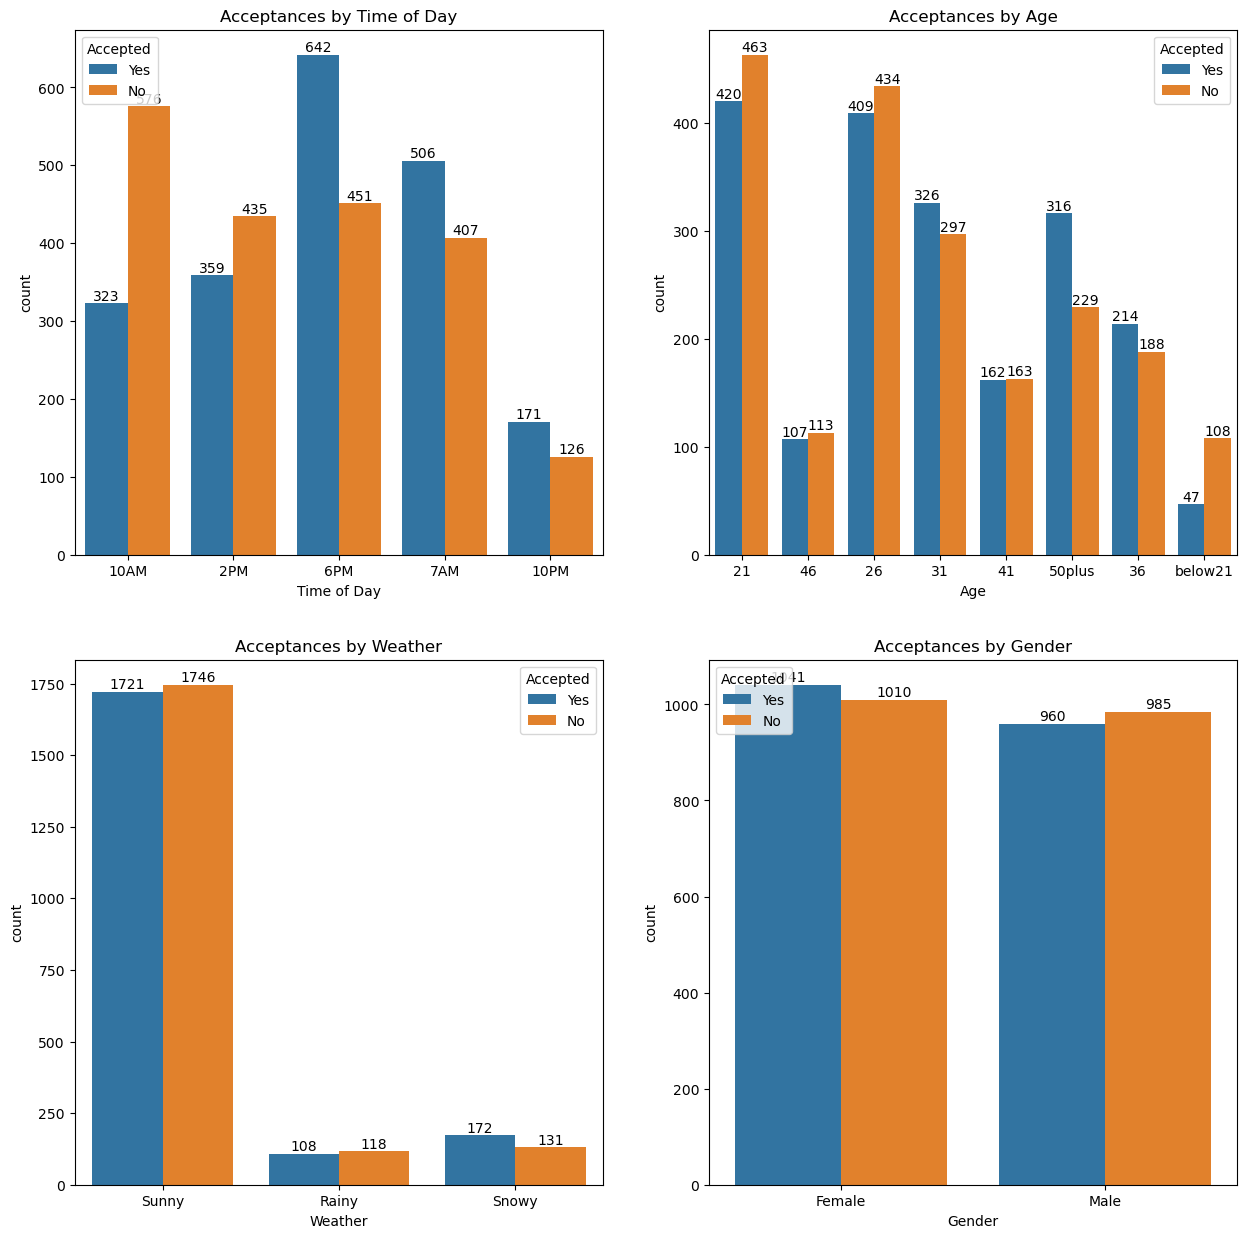

In [27]:
#multiple axis for graph readibility
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(coffee_house_data, x='time', hue=coffee_house_data['Y'], ax=axes[0,0])
sns.countplot(coffee_house_data, x='weather', hue=coffee_house_data['Y'], ax=axes[1,0])
sns.countplot(coffee_house_data, x='age', hue=coffee_house_data['Y'], ax=axes[0,1])
sns.countplot(coffee_house_data, x='gender', hue=coffee_house_data['Y'], ax=axes[1,1])

#labels for each graph
axes[0,0].legend(title='Accepted', loc='upper left', labels=['Yes', 'No'])
axes[0,0].set(xlabel ="Time of Day", title ='Acceptances by Time of Day')
axes[0,0].bar_label(axes[0,0].containers[0], fontsize=10);
axes[0,0].bar_label(axes[0,0].containers[1], fontsize=10);

axes[0,1].legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
axes[0,1].set(xlabel ="Age", title ='Acceptances by Age')
axes[0,1].bar_label(axes[0,1].containers[0], fontsize=10);
axes[0,1].bar_label(axes[0,1].containers[1], fontsize=10);

axes[1,0].legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
axes[1,0].set(xlabel ="Weather", title ='Acceptances by Weather')
axes[1,0].bar_label(axes[1,0].containers[0], fontsize=10);
axes[1,0].bar_label(axes[1,0].containers[1], fontsize=10);

axes[1,1].legend(title='Accepted', loc='upper left', labels=['Yes', 'No'])
axes[1,1].set(xlabel ="Gender", title ='Acceptances by Gender')
axes[1,1].bar_label(axes[1,1].containers[0], fontsize=10);
axes[1,1].bar_label(axes[1,1].containers[1], fontsize=10);

plt.savefig('images/acceptance_by_time_age.png')

Here we can see that people were more likely to accept coupons for the coffee shop earlier in the day and if they were younger than 26. Combining these categories would when sending out coupons would likely be the most efficient way of driving business to the store. So, we will target a group that meets all the most successful criteria

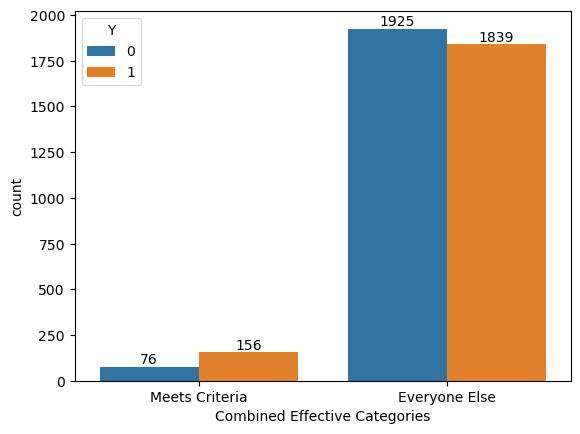

In [28]:
#where clause to create new column for combined criteria, including age, time, temperature, and distance
coffee_house_data['combined_effective_categories'] = np.where(
        (
            (
                (coffee_house_data['age'].isin(['21','26', 'below21'])) &
                (coffee_house_data['time'].isin(['10AM','2PM'])) &
                (coffee_house_data['temperature'] == 80) &
                (coffee_house_data['toCoupon_GEQ15min'] == 0) &
                (coffee_house_data['toCoupon_GEQ25min'] == 0) 
            )
        
        ),
        "Meets Criteria", "Everyone Else"
    )

plot = sns.countplot(coffee_house_data, x='combined_effective_categories', hue=coffee_house_data['Y'])
plot.bar_label(plot.containers[0], fontsize=10);
plot.bar_label(plot.containers[1], fontsize=10);
plot.set_xlabel("Combined Effective Categories")

plt.savefig('images/acceptance_by_combined_categories.png')

In [29]:
While this dramatically reduces the sample size possible, the proportion of people who are likely to use the coupon is much higher than the general group.

SyntaxError: invalid syntax (3321819298.py, line 1)